In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

N = 20
M = 70

In [74]:
input_matrix = np.random.uniform(-5, 5, (N,3))
population_matrix = np.random.random((M, 12))
weights = np.random.uniform(-1, 1, (1, 12))

In [75]:
def calculate_mean_rows(mat):
    return np.mean(mat, axis = 1)

In [76]:
def calculate_error(mat, W):
    length = int(len(W))
    
    h1 = W[:int(length/4)] * mat
    h2 = W[int(length/4):int(length/2)] * mat
    
    f1 = W[int(length/2):int(3*length/4)] * h1
    f2 = W[int(3*length/4):] * h2
    
    f = f1 + f2
    
    y_pred = calculate_mean_rows(f)
    y = calculate_mean_rows(mat)
    
    return np.square(np.subtract(y, y_pred)).mean()

In [77]:
def mutation(matrix, rate, max_idx):
    mut_value = np.random.uniform(-1, 1)
    
    if rate < .3:
        matrix[max_idx] = mut_value
    
    return matrix

In [78]:
def crossing_over(matrix, max_idx, min_idx_1, min_idx_2):
    rate = np.random.random()
    cutting_idx = np.random.randint(0, len(matrix))
    cutting_side_rate = np.random.random()
    
    if .1 <= rate < .5:
        if cutting_side_rate < .5:
            matrix[max_idx] = np.array(list(matrix[min_idx_1][:cutting_idx]) + \
                                            list(matrix[min_idx_2][cutting_idx:]))
            matrix = mutation(matrix, rate, max_idx)
        else:
            matrix[max_idx] = np.array(list(matrix[min_idx_2][:cutting_idx]) + \
                                            list(matrix[min_idx_1][cutting_idx:]))
            matrix = mutation(matrix, rate, max_idx)
    elif rate < .1:
        if cutting_side_rate < .5:
            matrix[max_idx] = np.array(list(matrix[min_idx_1][:len(matrix)]) + \
                                                list(matrix[min_idx_2][len(matrix):]))
            matrix = mutation(matrix, rate, max_idx)
        else: 
            matrix[max_idx] = np.array(list(matrix[min_idx_2][:len(matrix)]) + \
                                                list(matrix[min_idx_1][len(matrix):]))
            matrix = mutation(matrix, rate, max_idx)
    
    return matrix

In [79]:
def get_max_min_indices(matrix):
    min_idx_1 = matrix.index(sorted(matrix)[0])
    min_idx_2 = matrix.index(sorted(matrix)[1])
    max_idx = matrix.index(sorted(matrix)[-1])
    
    return min_idx_1, min_idx_2, max_idx

In [80]:
def calculate_errors_in_population(inpt_mat, pop_mat):
    errors = [calculate_error(inpt_mat, row) for row in pop_mat]
    
    return errors

In [81]:
def genetic_optimizer(input_matrix, population_matrix):
    print("Input Matrix:")
    print(str(input_matrix) + "\n")
    
    errors_list = []
    max_error = 99999999
    itr = 0
    
    while max_error > 0.05:
        errors = calculate_errors_in_population(input_matrix, population_matrix)
        min_idx_1, min_idx_2, max_idx = get_max_min_indices(errors)
        max_error = max(errors)
        
        errors_list.append(errors)
        if itr % 10 == 0:
            print("Generation: " + str(itr))
            print("Fitness errors of chromosomes")
            print(str(np.round(errors, 4)) + "\n")

        population_matrix = crossing_over(population_matrix, max_idx, min_idx_1, min_idx_2)
        
        itr += 1
    
    return errors_list

In [82]:
errors_list = genetic_optimizer(input_matrix, population_matrix)

Input Matrix:
[[ 1.19629159  3.56424312 -2.12280198]
 [-0.66313729 -1.22333149 -1.72114484]
 [-3.7171804   0.97596358  4.27030846]
 [ 3.40111185 -4.76015014 -0.52957525]
 [-0.74900493 -3.66673541  1.21269897]
 [-3.55978497 -3.64739934  4.84920409]
 [ 3.02163948 -2.31374792  3.31947902]
 [-3.08617117 -4.3281319   4.61592427]
 [-1.55109181  3.18321231 -3.28526232]
 [ 2.07800486 -4.38836649  4.59384997]
 [-1.46221558  3.80907676  0.06328615]
 [-4.83868497 -1.17189341  0.6316193 ]
 [-2.09838882 -1.29756065  1.45002764]
 [-3.96044205 -1.44868675  2.05009131]
 [-4.31039548 -1.07359004  2.58399068]
 [-2.91665678  3.94516694 -4.17392086]
 [-4.1133154   1.74104428  3.14852494]
 [ 0.72468608 -2.55170881 -1.93484607]
 [ 2.33054873 -4.85567619  4.92574381]
 [-2.52853018 -1.17921345  4.16056385]]

Generation: 0
Fitness errors of chromosomes
[ 0.7396  0.2092  0.4757  0.5073  0.1846  0.3525  0.159   0.6679  0.4544
  0.2086  0.2668  1.1476  0.1441  0.5205  0.4563  0.1581  0.7252  0.5117
  0.7447  0.07

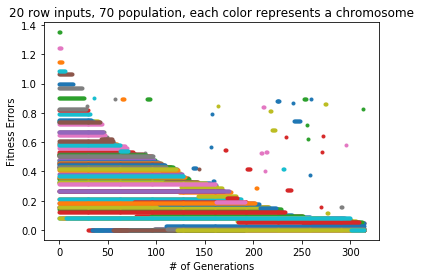

In [83]:
plt.plot(np.array(errors_list),'.')
plt.xlabel('# of Generations')
plt.ylabel('Fitness Errors')
plt.title(str(N) + ' row inputs, ' + str(M) + ' population, each color represents a chromosome')
plt.show()